### Building a linear regression model to predict pH value with guided steps 

In [4]:
import pandas as pd

In [5]:
df = pd.read_excel(r"C:\Users\enigmire\Documents\pythonproject\ML\agric data\soil-data.xlsx")

In [6]:
df

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,1,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.060,1.768,0.40
1,2,54.0,26.0,20.0,6.071,0.355,1.451688,0.00,14.587814,32.742137,180,1055,60.04,3.660,17.580,1.684,0.41
2,3,28.0,36.0,36.0,6.921,0.675,1.767599,0.40,14.910394,19.024525,183,1215,61.24,3.060,18.000,1.840,0.46
3,4,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.040,0.844,0.50
4,5,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.160,1.216,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,777,26.0,46.0,28.0,6.720,0.454,2.080000,0.00,7.660000,20.670000,395,500,38.07,0.394,26.480,1.468,0.33
777,778,40.0,28.0,32.0,7.790,0.343,1.380000,30.00,5.200000,4.140000,286,154,12.79,0.241,6.328,0.603,0.12
778,779,34.0,28.0,38.0,7.630,1.135,1.870000,24.30,17.130000,6.900000,582,164,10.73,0.439,5.390,1.141,0.26
779,780,16.0,38.0,46.0,7.730,0.393,1.720000,46.30,3.920000,7.930000,335,572,11.61,0.263,3.770,2.195,0.27


### Data Preprocessing

In [7]:
# dropping the ID column

df = df.drop(['ID'], axis = 'columns')

In [8]:
df.head(5)

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.06,1.768,0.40
1,54.0,26.0,20.0,6.071,0.355,1.451688,0.00,14.587814,32.742137,180,1055,60.04,3.660,17.58,1.684,0.41
2,28.0,36.0,36.0,6.921,0.675,1.767599,0.40,14.910394,19.024525,183,1215,61.24,3.060,18.00,1.840,0.46
3,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.04,0.844,0.50
4,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.16,1.216,0.40


In [9]:
#checking if there is a duplicate in the dataset

df.duplicated().sum()

0

In [10]:
dfC = df.copy()

In [11]:
dfC.isnull().sum()

Sand %       0
Clay %       0
Silt %       0
pH           0
EC mS/cm     0
O.M. %       0
CACO3 %      0
N_NO3 ppm    0
P ppm        0
K ppm        0
Mg ppm       0
Fe ppm       0
Zn ppm       0
Mn ppm       1
Cu ppm       0
B ppm        0
dtype: int64

In [12]:
# filling missing values

dfC.fillna(dfC.mean(), inplace=True)

In [13]:
dfC.isnull().sum()

Sand %       0
Clay %       0
Silt %       0
pH           0
EC mS/cm     0
O.M. %       0
CACO3 %      0
N_NO3 ppm    0
P ppm        0
K ppm        0
Mg ppm       0
Fe ppm       0
Zn ppm       0
Mn ppm       0
Cu ppm       0
B ppm        0
dtype: int64

In [14]:
dfC.shape

(781, 16)

In [15]:
#checking and removing outliers

import numpy as np
from scipy import stats


# Calculate Z-scores for each column
z_scores = np.abs(stats.zscore(dfC))

# Define a threshold for outlier detection (e.g., 3 is a common choice)
threshold = 3

# Find the indices of outliers in each column
outlier_indices = np.where(z_scores > threshold)

# Create a DataFrame containing the outlier indices

df_Outlier = pd.DataFrame({'Row': outlier_indices[0], 'Column': outlier_indices[1]})



#outlier_indices
df_Outlier


,Row,Column
0,1,12
1,2,12
2,5,10
3,40,5
4,40,8
...,...,...
158,761,15
159,762,4
160,764,8
161,764,12


In [16]:
# Remove outliers from the original DataFrame
dfC = dfC.drop(df_Outlier['Row'])

# You can also reset the index of the cleaned DataFrame if needed
dfC.reset_index(drop=True, inplace=True)

# Print the cleaned DataFrame
dfC

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.060,1.768,0.40
1,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.040,0.844,0.50
2,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.160,1.216,0.40
3,37.2,34.8,28.0,6.466,0.975,2.358052,0.00,35.555556,14.451988,183,1215,108.00,0.318,38.280,1.634,0.46
4,26.8,47.2,26.0,5.696,0.210,1.703664,0.00,4.784946,12.096439,270,1047,97.00,0.334,24.600,1.442,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,26.0,46.0,28.0,6.720,0.454,2.080000,0.00,7.660000,20.670000,395,500,38.07,0.394,26.480,1.468,0.33
661,40.0,28.0,32.0,7.790,0.343,1.380000,30.00,5.200000,4.140000,286,154,12.79,0.241,6.328,0.603,0.12
662,34.0,28.0,38.0,7.630,1.135,1.870000,24.30,17.130000,6.900000,582,164,10.73,0.439,5.390,1.141,0.26
663,16.0,38.0,46.0,7.730,0.393,1.720000,46.30,3.920000,7.930000,335,572,11.61,0.263,3.770,2.195,0.27


In [17]:
# changing the position of the outcome column in the dataset

# the desired new position for the column
new_position = 0

# the column names of the DataFrame
column_names = dfC.columns.tolist()

# Removing the column that the position will change
column_to_move = column_names.pop(column_names.index('pH'))

# Insert the column at the desired new position
column_names.insert(new_position, column_to_move)

# Reindex the DataFrame with the updated column order
dfC = dfC.reindex(columns=column_names)

dfC.columns

Index(['pH', 'Sand %', 'Clay %', 'Silt %', 'EC mS/cm', 'O.M. %', 'CACO3 %',
       'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm',
       'Cu ppm', 'B ppm'],
      dtype='object')

In [18]:
dfC

,pH,Sand %,Clay %,Silt %,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,5.162,42.0,38.0,20.0,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.060,1.768,0.40
1,7.704,58.0,20.0,22.0,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.040,0.844,0.50
2,7.609,33.2,41.2,25.6,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.160,1.216,0.40
3,6.466,37.2,34.8,28.0,0.975,2.358052,0.00,35.555556,14.451988,183,1215,108.00,0.318,38.280,1.634,0.46
4,5.696,26.8,47.2,26.0,0.210,1.703664,0.00,4.784946,12.096439,270,1047,97.00,0.334,24.600,1.442,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,6.720,26.0,46.0,28.0,0.454,2.080000,0.00,7.660000,20.670000,395,500,38.07,0.394,26.480,1.468,0.33
661,7.790,40.0,28.0,32.0,0.343,1.380000,30.00,5.200000,4.140000,286,154,12.79,0.241,6.328,0.603,0.12
662,7.630,34.0,28.0,38.0,1.135,1.870000,24.30,17.130000,6.900000,582,164,10.73,0.439,5.390,1.141,0.26
663,7.730,16.0,38.0,46.0,0.393,1.720000,46.30,3.920000,7.930000,335,572,11.61,0.263,3.770,2.195,0.27


In [19]:
X = dfC.values[:,1:]

X

array([[42.   , 38.   , 20.   , ..., 27.06 ,  1.768,  0.4  ],
       [58.   , 20.   , 22.   , ...,  5.04 ,  0.844,  0.5  ],
       [33.2  , 41.2  , 25.6  , ...,  7.16 ,  1.216,  0.4  ],
       ...,
       [34.   , 28.   , 38.   , ...,  5.39 ,  1.141,  0.26 ],
       [16.   , 38.   , 46.   , ...,  3.77 ,  2.195,  0.27 ],
       [20.   , 34.   , 46.   , ...,  5.44 ,  5.717,  0.3  ]])

In [20]:
#Normalizing of data

from sklearn.preprocessing import StandardScaler

# Create the data
X = dfC.values[:,1:]

# Create the z-score scaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_normalized = scaler.transform(X)

# Print the normalized data
print(X_normalized)


[[ 1.00589538  0.26252418 -1.69434643 ...  1.08378253  0.01438649
   0.29817056]
 [ 2.53686848 -1.38444356 -1.4411122  ... -0.8374707  -0.7748486
   0.88719537]
 [ 0.16386017  0.55531845 -0.98529059 ... -0.65249991 -0.4571046
   0.29817056]
 ...
 [ 0.24040882 -0.6524579   0.58476163 ... -0.80693307 -0.52116589
  -0.52646417]
 [-1.48193592  0.26252418  1.59769854 ... -0.94827868  0.37910877
  -0.46756169]
 [-1.09919265 -0.10346865  1.59769854 ... -0.80257055  3.38742694
  -0.29085425]]


In [21]:
#creating a new dataframe with the normalized X data
dfNorm = pd.DataFrame(X_normalized, columns=['Sand %', 'Clay %', 'Silt %', 'EC mS/cm', 'O.M. %', 'CACO3 %','N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm',
       'Cu ppm', 'B ppm'])

In [22]:
dfNorm

,Sand %,Clay %,Silt %,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,1.005895,0.262524,-1.694346,-1.009333,3.337498,-1.056911,0.627399,0.900408,-0.924801,0.604250,2.613542,0.841207,1.083783,0.014386,0.298171
1,2.536868,-1.384444,-1.441112,-0.442170,-2.281493,-0.530239,-0.840543,-0.613214,-1.151288,-0.725999,-0.417519,2.734146,-0.837471,-0.774849,0.887195
2,0.163860,0.555318,-0.985291,-0.183095,-1.771302,-0.716897,-0.568511,-0.579200,-0.333012,0.307139,-0.151489,-0.970533,-0.652500,-0.457105,0.298171
3,0.546603,-0.030270,-0.681410,3.899083,0.724494,-1.056911,3.647972,0.390198,-0.661784,0.773063,3.317890,-0.620365,2.062732,-0.100070,0.651585
4,-0.448529,1.104308,-0.934644,-1.457463,-0.475143,-1.056911,-0.758420,0.101080,-0.026159,0.489457,2.853392,-0.579766,0.869147,-0.264067,0.239268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,-0.525078,0.994510,-0.681410,0.251030,0.214764,-1.056911,-0.346709,1.153393,0.887095,-0.433952,0.364949,-0.427519,1.033177,-0.241859,-0.114147
661,0.814524,-0.652458,-0.174941,-0.526194,-1.068491,1.266643,-0.698984,-0.875489,0.090738,-1.018045,-0.702552,-0.815749,-0.725092,-0.980699,-1.351099
662,0.240409,-0.652458,0.584762,5.019407,-0.170213,0.825168,1.009408,-0.536728,2.253323,-1.001164,-0.789540,-0.313333,-0.806933,-0.521166,-0.526464
663,-1.481936,0.262524,1.597699,-0.176093,-0.445196,2.529108,-0.882281,-0.410307,0.448733,-0.312406,-0.752380,-0.759925,-0.948279,0.379109,-0.467562


In [23]:
#adding the Y variable

dfNorm['pH'] = dfC['pH']

In [24]:
dfNorm

,Sand %,Clay %,Silt %,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,pH
0,1.005895,0.262524,-1.694346,-1.009333,3.337498,-1.056911,0.627399,0.900408,-0.924801,0.604250,2.613542,0.841207,1.083783,0.014386,0.298171,5.162
1,2.536868,-1.384444,-1.441112,-0.442170,-2.281493,-0.530239,-0.840543,-0.613214,-1.151288,-0.725999,-0.417519,2.734146,-0.837471,-0.774849,0.887195,7.704
2,0.163860,0.555318,-0.985291,-0.183095,-1.771302,-0.716897,-0.568511,-0.579200,-0.333012,0.307139,-0.151489,-0.970533,-0.652500,-0.457105,0.298171,7.609
3,0.546603,-0.030270,-0.681410,3.899083,0.724494,-1.056911,3.647972,0.390198,-0.661784,0.773063,3.317890,-0.620365,2.062732,-0.100070,0.651585,6.466
4,-0.448529,1.104308,-0.934644,-1.457463,-0.475143,-1.056911,-0.758420,0.101080,-0.026159,0.489457,2.853392,-0.579766,0.869147,-0.264067,0.239268,5.696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,-0.525078,0.994510,-0.681410,0.251030,0.214764,-1.056911,-0.346709,1.153393,0.887095,-0.433952,0.364949,-0.427519,1.033177,-0.241859,-0.114147,6.720
661,0.814524,-0.652458,-0.174941,-0.526194,-1.068491,1.266643,-0.698984,-0.875489,0.090738,-1.018045,-0.702552,-0.815749,-0.725092,-0.980699,-1.351099,7.790
662,0.240409,-0.652458,0.584762,5.019407,-0.170213,0.825168,1.009408,-0.536728,2.253323,-1.001164,-0.789540,-0.313333,-0.806933,-0.521166,-0.526464,7.630
663,-1.481936,0.262524,1.597699,-0.176093,-0.445196,2.529108,-0.882281,-0.410307,0.448733,-0.312406,-0.752380,-0.759925,-0.948279,0.379109,-0.467562,7.730


### Data splitting

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = dfNorm[['Sand %', 'Clay %', 'Silt %', 'EC mS/cm', 'O.M. %', 'CACO3 %','N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm',
       'Cu ppm', 'B ppm']]
y = dfNorm['pH']

# 'X' is your input data and 'y' is the pH values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




### Model building

In [26]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict pH values on the test data
y_pred = model.predict(X_test)

### Model Evaluation

In [27]:
# Calculate the mean squared error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f'R-squared (R2): {R2}')

Mean Squared Error: 0.15706715492201517
R-squared (R2): 0.7970822586227649


### Feature Selection

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Xi = dfC[['Sand %', 'Clay %', 'Silt %', 'EC mS/cm', 'O.M. %', 'CACO3 %','N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm',
       'Cu ppm', 'B ppm']]
yi = dfC['pH']

# estimator (model) to use for feature selection
estimator = LinearRegression()

# Create the RFE selector
# Specify the estimator, the number of features to select (n_features_to_select)
rfe = RFE(estimator, n_features_to_select=7)

# Fit the RFE selector on your data to perform feature selection
X_selected = rfe.fit_transform(Xi, yi)

# Get the selected feature names
selected_feature_names = [feature_name for feature_name, is_selected in zip(Xi.columns, rfe.support_) if is_selected]

In [29]:
selected_feature_names

['EC mS/cm', 'O.M. %', 'N_NO3 ppm', 'Fe ppm', 'Mn ppm', 'Cu ppm', 'B ppm']

### Model Refinement

In [30]:
dfR = dfNorm[selected_feature_names].copy()

In [31]:
dfR

,EC mS/cm,O.M. %,N_NO3 ppm,Fe ppm,Mn ppm,Cu ppm,B ppm
0,-1.009333,3.337498,0.627399,2.613542,1.083783,0.014386,0.298171
1,-0.442170,-2.281493,-0.840543,-0.417519,-0.837471,-0.774849,0.887195
2,-0.183095,-1.771302,-0.568511,-0.151489,-0.652500,-0.457105,0.298171
3,3.899083,0.724494,3.647972,3.317890,2.062732,-0.100070,0.651585
4,-1.457463,-0.475143,-0.758420,2.853392,0.869147,-0.264067,0.239268
...,...,...,...,...,...,...,...
660,0.251030,0.214764,-0.346709,0.364949,1.033177,-0.241859,-0.114147
661,-0.526194,-1.068491,-0.698984,-0.702552,-0.725092,-0.980699,-1.351099
662,5.019407,-0.170213,1.009408,-0.789540,-0.806933,-0.521166,-0.526464
663,-0.176093,-0.445196,-0.882281,-0.752380,-0.948279,0.379109,-0.467562


In [32]:
Xr = dfR[selected_feature_names]
yr = dfNorm['pH']

#'X' is your input data and 'y' is the pH values
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)


In [33]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(Xr_train, yr_train)

# Predict pH values on the test data
yr_pred = model.predict(Xr_test)

In [34]:
# Calculate the mean squared error (MSE) to evaluate the model
mse = mean_squared_error(yr_test, yr_pred)
R2 = r2_score(yr_test, yr_pred)
print(f"Mean Squared Error: {mse}")
print(f'R-squared (R2): {R2}')

Mean Squared Error: 0.16227049455234793
R-squared (R2): 0.7903599752406663


In [35]:
# I conclude that 8 features are contributing to the prediction of pH

In [37]:
def plot_perm_importance(model, X, y, CPU):
    """
    Compute the feature permutation importance

    Parameters
    ----------
    model: estimator obtained after fitting
    X: feature dataframe
    y: target dataframe
    CPU: boolean for CPU training
    
    Returns
    -------
    plotting: feature permutation importance
    perm_imp: sorted array of feature permutation importance
    """       
    if is_classifier(model):
       scoring = 'accuracy'
    else:
       scoring = 'r2'  
    if CPU==True:
       result = permutation_importance(model, X, y, scoring=scoring, n_repeats=10, n_jobs=-1)
    else:
       result = permutation_importance(model, X, y, scoring=scoring, n_repeats=10)
    sorted_idx = result.importances_mean.argsort()
    perm_imp = np.array([X.columns[sorted_idx], result.importances[sorted_idx].mean(axis=1).T]).T
    perm_imp.T[1] = perm_imp.T[1] / np.sum(perm_imp.T[1])
    fig, ax = plt.subplots()
    ax.barh(perm_imp.T[0], perm_imp.T[1])
    ax.set_title("Permutation Importance")
    fig.tight_layout()
    plt.show()
    return perm_imp

In [48]:
from sklearn.base import BaseEstimator, is_classifier, is_regressor, TransformerMixin
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
CPU = False

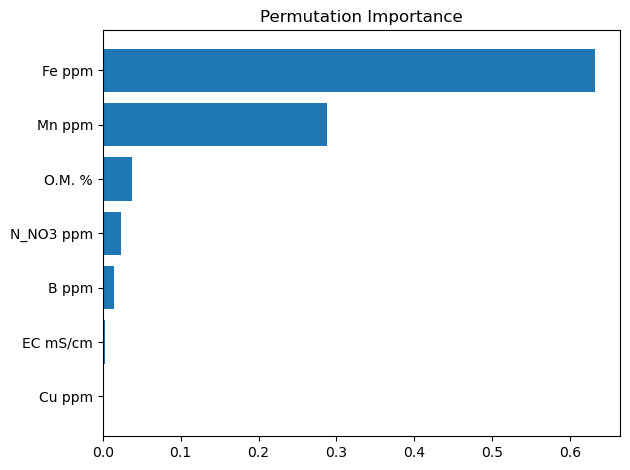

array([['Cu ppm', 0.00034708733336022185],
       ['EC mS/cm', 0.0025795315664414306],
       ['B ppm', 0.014226420833631797],
       ['N_NO3 ppm', 0.02378007769269695],
       ['O.M. %', 0.03793655280951843],
       ['Mn ppm', 0.28833588249831404],
       ['Fe ppm', 0.6327944472660372]], dtype=object)

In [51]:
plot_perm_importance(model, Xr_test, y_test, CPU)